In [6]:
# Finding the euclidean distance between two points
# From python3.8 onwards we have built-in function for distance.
# https://docs.python.org/3.8/whatsnew/3.8.html#math
# Anyways I have also written the naive implementation for finding distance for 2 dimensional data

In [7]:
# from math import sqrt
# plot1 = [1,3]
# plot2 = [2,5]

# euclidiean_distace = sqrt((plot1[0] - plot2[0]) ** 2 + (plot1[1] - plot2[1]) ** 2)

In [29]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from collections import Counter
style.use('fivethirtyeight')

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random

In [10]:
dataset = {'k' : [[1,2], [2,3], [3,1]], 'r' : [[6,5], [7,7], [8,6]]}

In [11]:
new_features = [5,7]

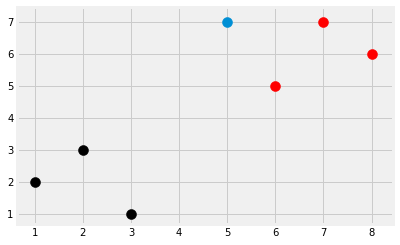

In [16]:
# for i in dataset:
#     for ii in dataset[i]:
#         plt.scatter(ii[0], ii[1], s = 100, color = i)

# plt.scatter(new_features[0], new_features[1], s = 100)
# plt.show()


In [85]:
def knn(data, predict, k=3):
    if(len(data) >= k):
        warnings.warn('K is set to value less than voting groups available')
    
    distances = []
    for group in data:
        for features in data[group]:
            # The old slow method
            # euclidean_distace = sqrt((features[0] - predict[0]) ** 2 + (features[1] - predict[1]) ** 2)
            # We can use the numpy's built-in fast method for calculating euclidean distance
            # euclidean_distance = np.sqrt(np.sum((np.array(features) - np.array(predict)) ** 2)) 
            # There is more simple and faster method
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance,group])
    
    votes = []
    votes = [i[1] for i in sorted(distances)[:k]]
    #[0][0] is required as most_common returns an array of tuples
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    #print(Counter(votes).most_common(1))
    return(vote_result)
    

In [33]:
result = knn(dataset, new_features, k=3)
print(result)

[('r', 3)]
r


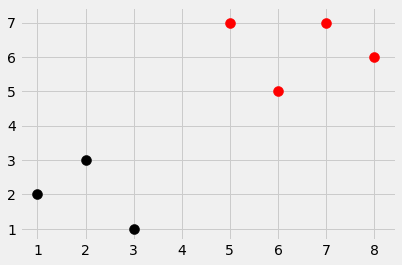

In [35]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0], ii[1], s = 100, color = i)
plt.scatter(new_features[0], new_features[1], s = 100, color = result)
plt.show()

# Testing it on the breast-cancer dataset

In [37]:
df = pd.read_csv("breast-cancer-wisconsin.data")

In [38]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [39]:
# Replace the missing ? with outliers
df.replace('?', -99999, inplace = True)

In [42]:
df.drop(['id'],axis = 1, inplace = True)

In [61]:
df = df.astype(float)

In [62]:
df.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


In [63]:
Y = df['class']

In [64]:
X = np.array(df.drop(['class'], axis = 1))

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 54, stratify = Y, test_size = 0.2)

In [70]:
benign = 0
malignant = 0
for y in Y_train:
    if(y == 2):
        benign += 1
    elif(y == 4):
        malignant += 1

print("Percentage of benign samples")
print( benign / (benign + malignant) * 100)


Percentage of benign samples
65.47406082289802


In [72]:
# Another way to do the same without using the sklearn library

In [73]:
full_data = df.astype(float).values.tolist()

In [76]:
random.shuffle(full_data)

In [108]:
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}

In [109]:
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [110]:
# Now populate the dictionary that we pass to the K-NN algorithm

In [111]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [112]:
# To do similar with sklearn library we can do this to use our implementation

# for i,j in zip(Y_train,X_train):
#     test_set[i].append(X_train[j])

# Maybe .tolist() may help

# for i,j in zip(Y_test,X_test):
#     test_set[i].append(X_test[j])


In [113]:
# Let us evaluate

In [114]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = knn(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
print('Accuracy:', correct/total)

Accuracy: 0.9568345323741008
